In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fn = "data_1.csv"
df = pd.read_csv(fn, delimiter=";")
df

,Год,Время года,Климат,Город,Страна,Способ охлаждения,Режим при смешанном типе охлаждения,Способ обогрева,Возраст,Пол,...,Скорость воздуха,Рост,Вес,Занавески,Вентилятор,Окно,Двери,Отопление,Среднемесячная температура на улице,Количество рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,...,0.32,172.7,50.0,NaN,1.0,1.0,NaN,0.0,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,...,0.16,NaN,65.0,NaN,NaN,0.0,0.0,NaN,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['год', 'время_года', 'климат', 'город', 'страна', 'способ_охлаждения',
       'режим_при_смешанном_типе_охлаждения', 'способ_обогрева', 'возраст',
       'пол', 'ощущение_температуры', 'ощущение_температуры_(bool)',
       'предпочтительное_изменение_температуры',
       'ощущение_движения_воздуха_(bool)',
       'предпочтительное_изменение_движения_воздуха', 'оценка_комфорта',
       'утепление', 'температура_воздуха_в_помещении',
       'температура_воздуха_на_улице', 'rh', 'скорость_воздуха', 'рост', 'вес',
       'занавески', 'вентилятор', 'окно', 'двери', 'отопление',
       'среднемесячная_температура_на_улице', 'количество_рекламаций'],
      dtype='object')

In [6]:
def custom_correct():
    global df
    replace_climat = {"Cубтроп океанич": "Cубтропический океанический"}
    replace_delta_temp = {"Холодн": "Холоднее", "Тепле": "Теплее"}
    df["климат"] = df["климат"].apply(
        lambda x: replace_climat[x] if x in replace_climat.keys() else x
    )
    df["предпочтительное_изменение_температуры"] = df[
        "предпочтительное_изменение_температуры"
    ].apply(lambda x: replace_delta_temp[x] if x in replace_delta_temp.keys() else x)


In [7]:
custom_correct()
print(df["климат"].unique())
print(df["предпочтительное_изменение_температуры"].unique())

['Cубтропический океанический' 'Субтропическое высокогорье'
 'Жаркий полузасушливый' 'Тропическая влажная саванна'
 'Влажный субтропический муссонный']
['Без изменений' 'Теплее' 'Холоднее']


In [8]:
nominal_columns = ["время_года", "климат", "город", "страна", "способ_охлаждения",
                   "режим_при_смешанном_типе_охлаждения", "способ_обогрева",
                   "пол", "ощущение_температуры_(bool)",
                   "предпочтительное_изменение_температуры",
                   "предпочтительное_изменение_движения_воздуха", "окно",
                    "двери", "отопление"
                   ]
sequenced_columns = ["год", "оценка_комфорта"]
numeric_columns = ["возраст", "ощущение_температуры", "утепление",
                   "температура_воздуха_в_помещении",
                   "температура_воздуха_на_улице",
                   "rh", "скорость_воздуха", "рост", "вес",
                   "среднемесячная_температура_на_улице", "количество_рекламаций"
                   ]

In [9]:
def get_scatter(num_cols):
    global df
    sns.scatterplot(data=df, x=num_cols[0], y=num_cols[1])

In [10]:
def get_all_scatters(num_cols):
    global df

    combos = tuple(combinations(numeric_columns, 2))

    fig, axs = plt.subplots(len(combos) // 4, 4, figsize=(20, 4 * len(combos) // 4))
    x_index = 0
    y_index = 0

    for first_col, second_col in combos:
        if y_index == 4:
            x_index += 1
        y_index %= 4
        sns.scatterplot(data=df, x=first_col, y=second_col, ax=axs[x_index, y_index])
        y_index += 1

    plt.tight_layout()

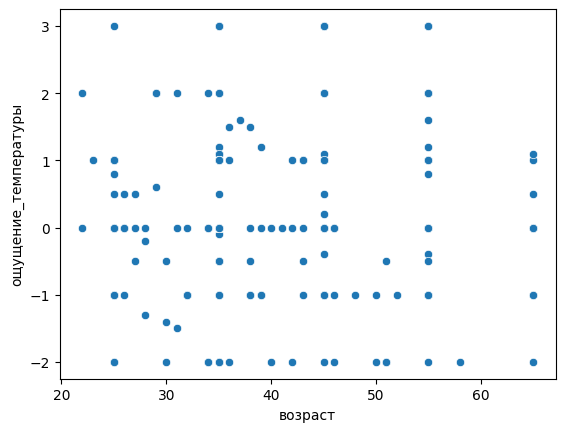

In [11]:
get_scatter(numeric_columns[:2])

IndexError: index 13 is out of bounds for axis 0 with size 13

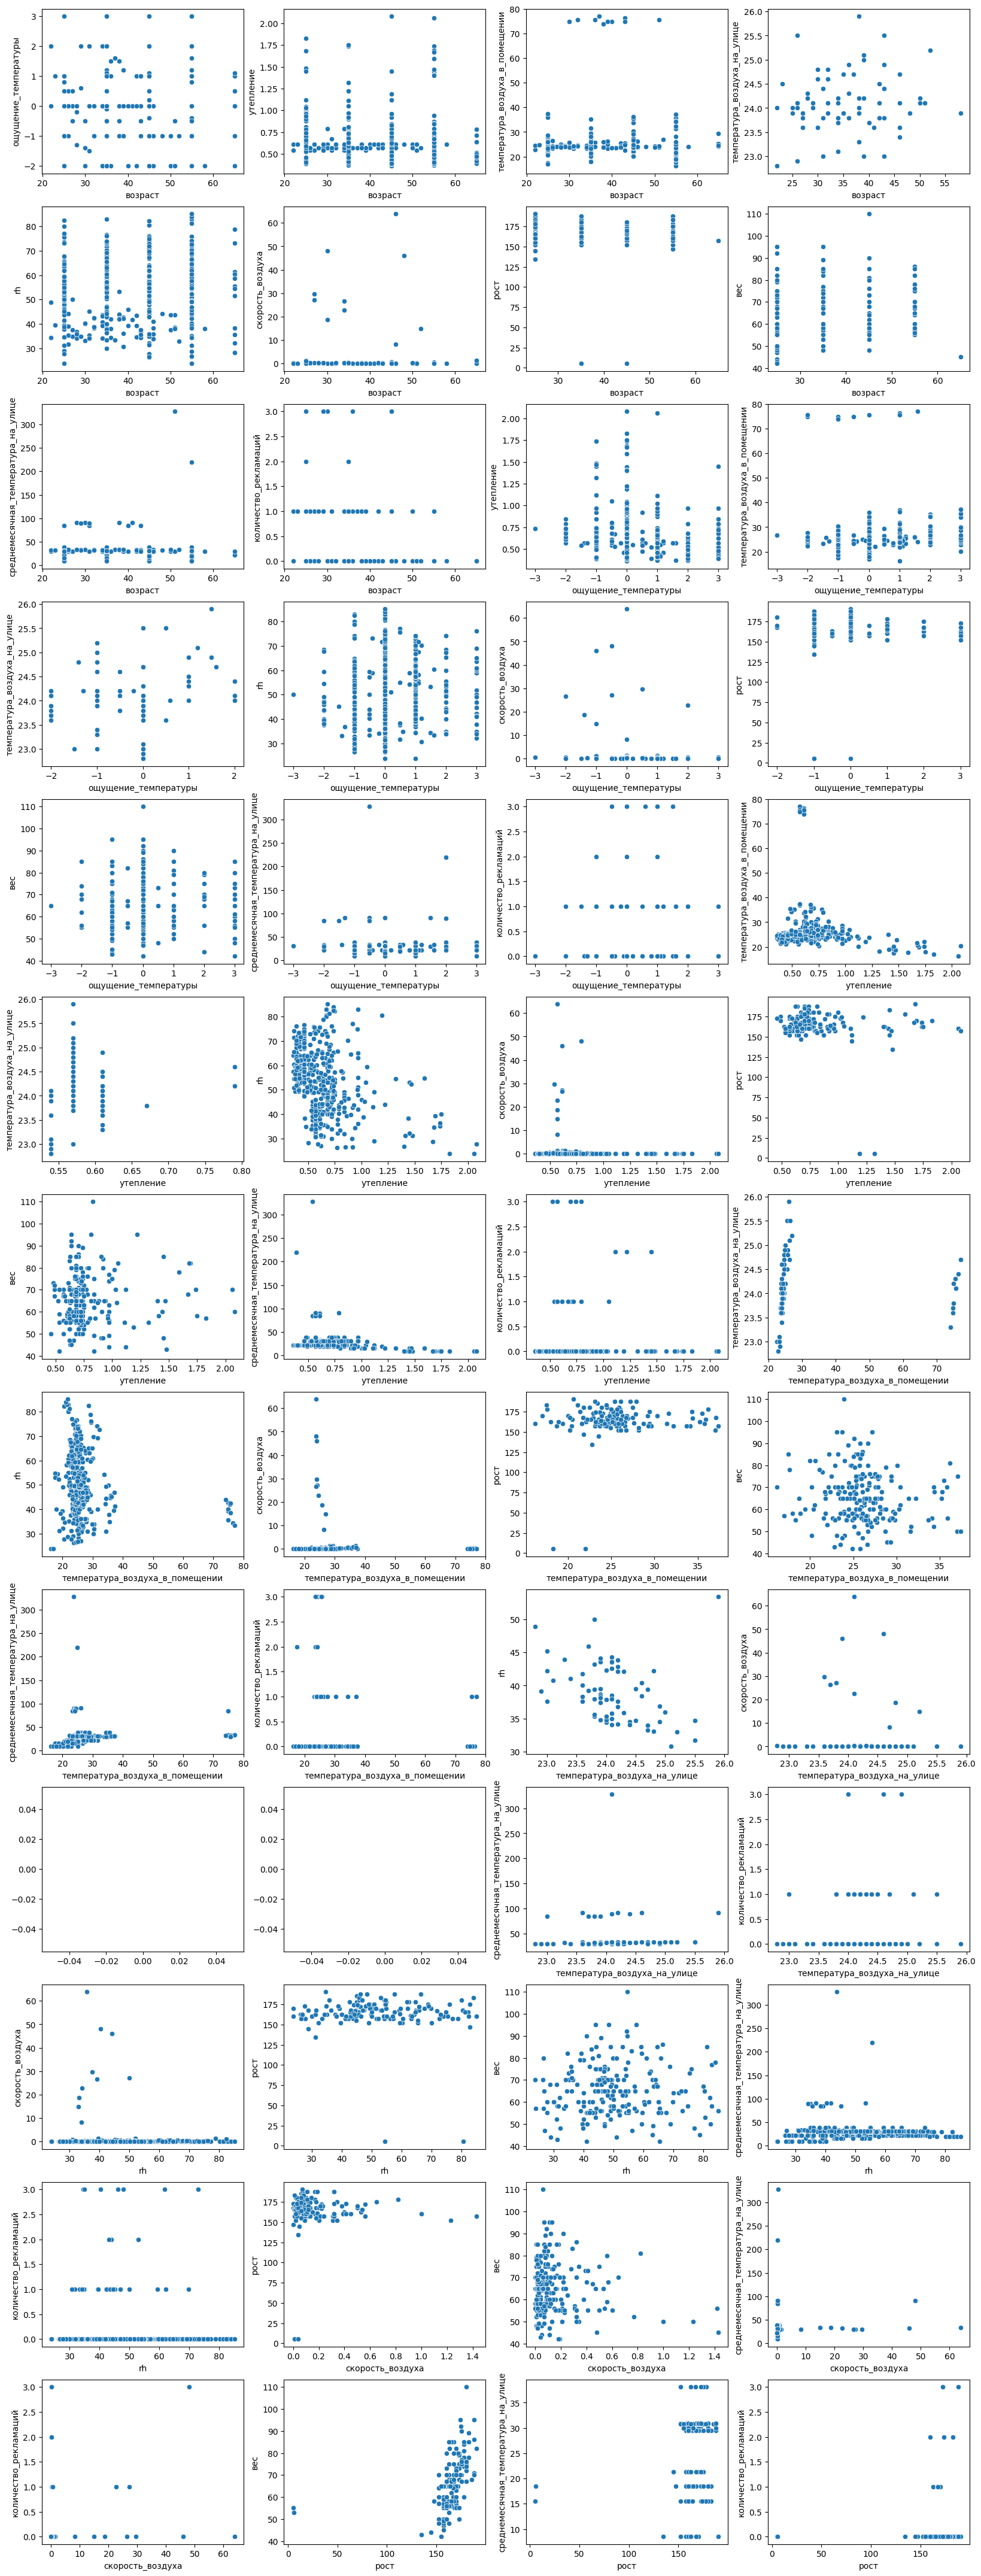

In [12]:
get_all_scatters(numeric_columns)

In [ ]:
df["окр_утепление"] = np.round(df["утепление"], 1)
test_df = df["утепление"].value_counts().reset_index()
test_df

In [ ]:
sns.scatterplot(data=test_df, x="утепление", y="count")